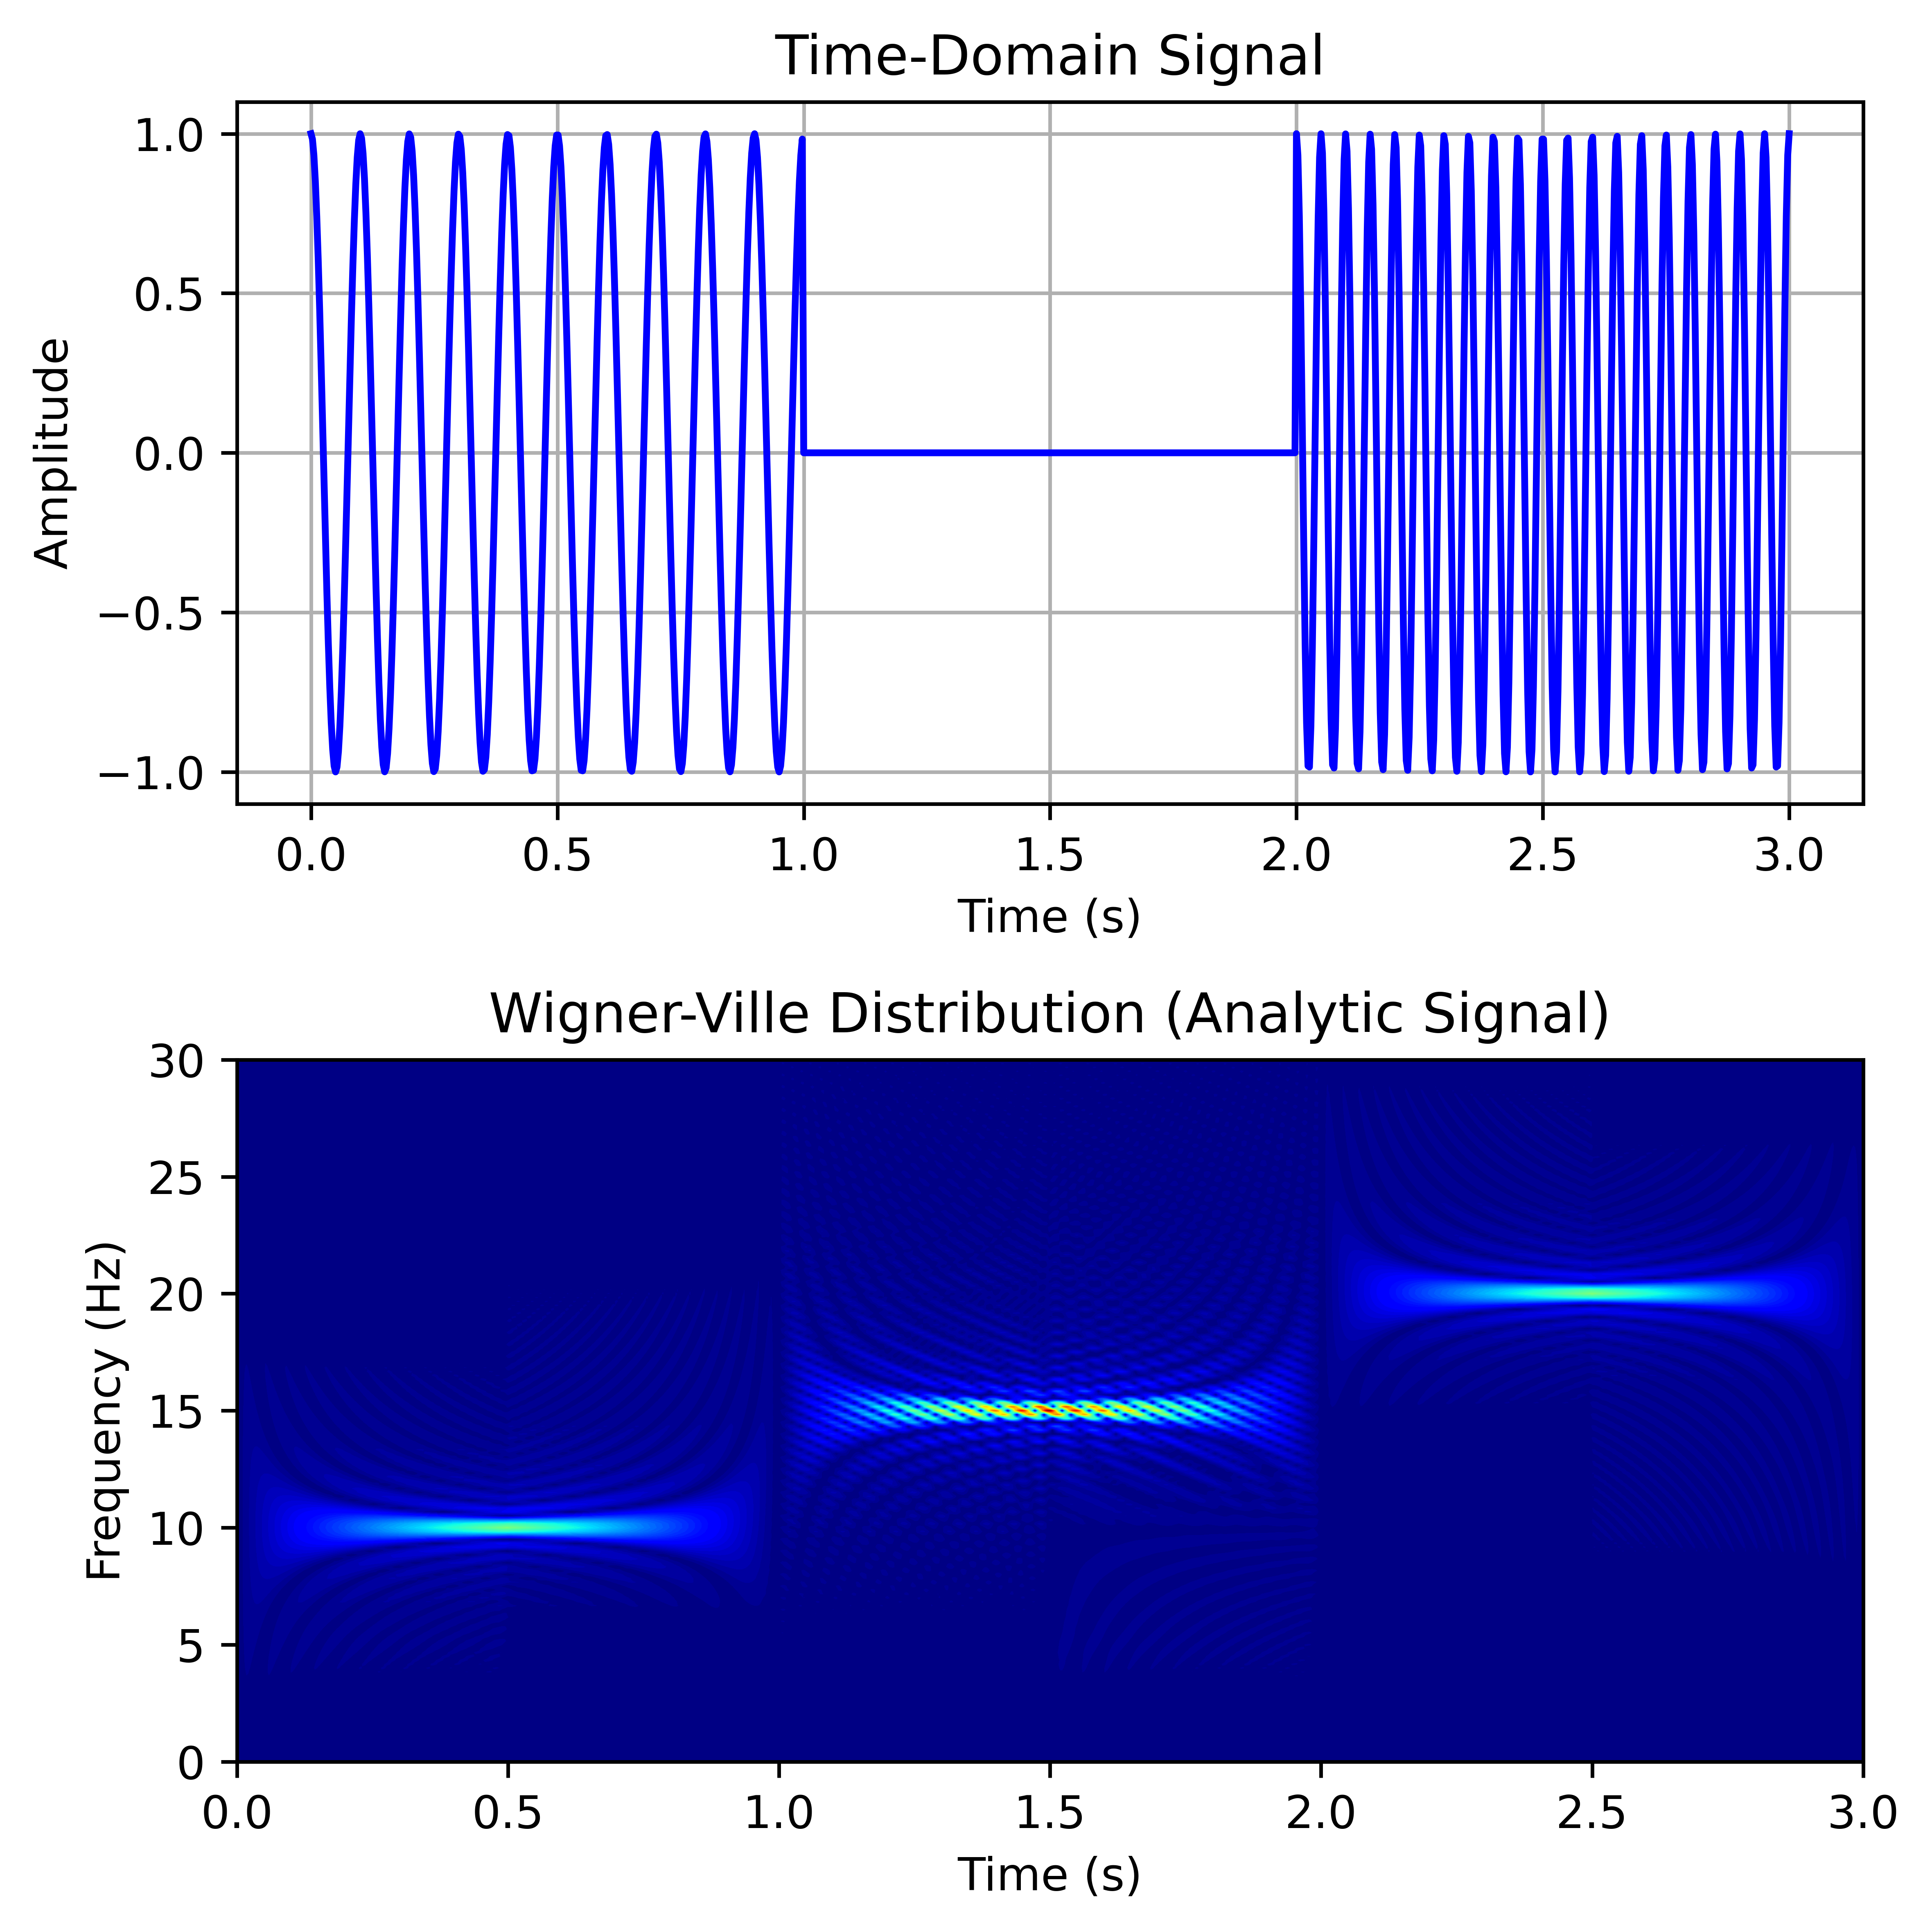

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from tftb.processing import WignerVilleDistribution

# Define a signal with two different frequency components
def s(t, t1=1, t2=2):
    omega1 = 2 * np.pi * 10  # 10 Hz
    omega2 = 2 * np.pi * 20  # 20 Hz
    A = 1

    return np.piecewise(t, 
                        [t < t1, (t >= t1) & (t < t2), t >= t2],
                        [lambda t: A * np.cos(omega1 * t), 
                         lambda t: 0, 
                         lambda t: A * np.cos(omega2 * t)])

# Time vector
t = np.linspace(0, 3, 1024)  # From 0 to 3 seconds, 1024 samples
signal = s(t)

# Compute the analytic signal using Hilbert transform to remove negative frequencies
analytic_signal = hilbert(signal)

# Compute the Wigner-Ville Distribution of the analytic signal
wvd = WignerVilleDistribution(analytic_signal, timestamps=t)
wvd.run()

# Frequencies corresponding to the WVD output
fs = 1 / (t[1] - t[0])  # Sampling frequency
frequencies = np.linspace(0, fs / 2, wvd.tfr.shape[0])

# Plot the WVD
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6), dpi=800)

# Plot the time-domain signal
ax1.plot(t, signal, color='b')
ax1.set_title('Time-Domain Signal')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.grid(True)

# Plot the Wigner-Ville Distribution (showing cross-terms)
cf = ax2.contourf(t, frequencies, np.abs(wvd.tfr), levels=100, cmap='jet')
ax2.set_title('Wigner-Ville Distribution (Analytic Signal)')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_ylim(0, 30)  # Limit frequency axis to 0-50 Hz for clarity

# Display the plot
plt.tight_layout()
plt.show()


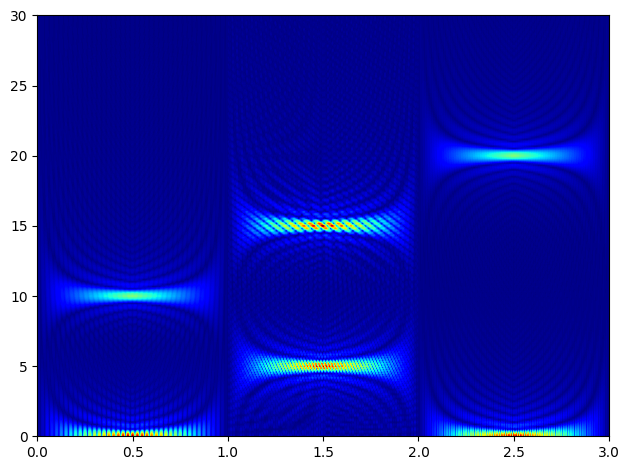

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tftb.processing import WignerVilleDistribution

def s(t, t1=1, t2=2, A=1, omega1 = 2 * np.pi * 10,omega2 = 2 * np.pi * 20):
    return np.piecewise(t, [t < t1, (t >= t1) & (t < t2), t >= t2],[lambda t: A * np.cos(omega1 * t), lambda t: 0, lambda t: A * np.cos(omega2 * t)])
t = np.linspace(0, 3, 1000)
wvd = WignerVilleDistribution(s(t), timestamps=t)
wvd.run()
fs = 1 / (t[1] - t[0])
frequencies = np.linspace(0, fs / 2, wvd.tfr.shape[0])
plt.contourf(t, frequencies, np.abs(wvd.tfr), levels=1000, cmap='jet')
plt.ylim((0,30))
plt.tight_layout()
plt.show()